<a href="https://colab.research.google.com/github/Raijin-ZD/UsedCarsDataEDA/blob/main/GermanyUsedCarsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** : Ziad Mohamed Shafik

**Id** : 7036334

**tut**: 1

# Dataset Overview

## Columns:

1. **brand:** The brand of the used car.
2. **model:** The model of the used car.
3. **color:** The color of the used car.
4. **registration_date:** The date when the car was initially registered.
5. **year:** The manufacturing year of the car.
6. **price_in_euro:** The price of the used car in euros.
7. **power_kw:** The power of the car in kilowatts.
8. **power_ps:** The power of the car in horsepower.
9. **transmission_type:** The type of transmission (e.g., automatic, manual).
10. **fuel_type:** The type of fuel used by the car.
11. **fuel_consumption_l_100km:** Fuel consumption in liters per 100 kilometers.
12. **fuel_consumption_g_km:** Fuel consumption in grams per kilometer.
13. **mileage_in_km:** The total distance the car has traveled in kilometers.
14. **offer_description:** Description of the car offer.

## Summary:

- The dataset provides information about used cars, including details about their make, model, color, registration date, manufacturing year, price, power, transmission type, fuel type, fuel consumption, mileage, and offer description.

- Key numerical features include `year`, `price_in_euro`, `power_kw`, `power_ps`, `fuel_consumption_l_100km`, `fuel_consumption_g_km`, and `mileage_in_km`.

- Categorical features include `brand`, `model`, `color`, `transmission_type`, `fuel_type`.

- The dataset appears to be comprehensive, covering various aspects relevant to the analysis of used cars in Germany.

- Further exploration and cleaning may be required to ensure the accuracy and usability of the data for the intended analysis.


# Project Overview: Analysis of Used Cars Dataset in Germany

**Introduction**

The project focuses on the exploration and analysis of a dataset containing information about used cars in Germany. The primary objectives include data cleaning, organization, and the extraction of valuable insights to enhance our understanding of the used car market in this region. This document provides an overview of the project goals and the motivation behind this analytical endeavor.

**Project Goals**

The overarching goals of this project can be summarized as follows:

1. *Data Cleaning and Organization:* Implement rigorous data cleaning techniques to ensure the dataset's integrity and reliability. Organize the information in a structured manner for efficient analysis.

2. *Insightful Data Exploration:* Conduct thorough exploratory data analysis to identify patterns, trends, and anomalies within the dataset. Formulate and answer specific research questions to extract meaningful insights.

3. *Research Question Formulation:* Develop pertinent research questions that address key aspects of the used car market in Germany. These questions serve as a guide for focused analysis and interpretation of the dataset.

4. *Visual Representation:* Utilize data visualization techniques to represent key findings in a clear and comprehensible manner. Visualizations enhance the interpretability of complex patterns within the dataset.

**Motivation**

The motivation behind this project stems from the significance of the used car market in Germany and the potential insights that can be extracted from a comprehensive analysis of the available dataset. Understanding the factors influencing pricing, demand, and other key metrics in this market can be invaluable for various stakeholders, including buyers, sellers, and policymakers.

Additionally, by addressing specific research questions, we aim to contribute to the existing body of knowledge surrounding the used car industry, enabling more informed decision-making and strategic planning.

Through meticulous data cleaning, organization, and exploratory analysis, this project strives to uncover hidden patterns and trends that may not be immediately apparent, providing a nuanced understanding of the dynamics at play in the German used car market.


**DATA PREPROCESSING**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats


In [ ]:

data = pd.read_csv("/content/data.csv")


In [ ]:
data.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [ ]:
data.info()
print(len(data)) #prints rows
print(len(data.columns))#prints cols
#251079 row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [ ]:
(data.isna().sum() / data.shape[0]) * 100

Unnamed: 0                   0.000000
brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.001593
year                         0.000000
price_in_euro                0.000000
power_kw                     0.053370
power_ps                     0.051378
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    10.703006
fuel_consumption_g_km        0.000000
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

**Trying to see if there is invalid data in the dataset**

In [ ]:
data.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

W = ALL VALID DATA VALUES

L = NOT ALL VALID DATA VALUES

In [ ]:
# W Column
data.brand.unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# W Column
data.model.unique()

array(['Alfa Romeo GTV', 'Alfa Romeo 164', 'Alfa Romeo Spider', ...,
       'Volvo XC40', 'Volvo C40', 'Volvo'], dtype=object)

In [ ]:
# L Column need to handle the nan unqiue value and missing values
data.color.unique()

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange',
       nan], dtype=object)

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.registration_date.unique()

array(['10/1995', '02/1995', '07/1995', '11/1996', '04/1996', '12/1996',
       '07/1996', '01/1996', '02/1996', '10/1996', '05/1997', '06/1997',
       '10/1997', '03/1997', '01/1997', '02/1997', '04/1997', '07/1997',
       '09/1997', '07/1998', '05/1998', '01/1998', '11/1998', '09/1998',
       '07/1999', '02/1999', '06/1999', '12/1999', '05/1999', '01/1999',
       '04/1999', '03/1999', '10/2000', '06/2000', '05/2000', '01/2000',
       '04/2000', '11/2000', '03/2000', '02/2000', '09/2001', '02/2001',
       '03/2001', '01/2001', '11/2001', '12/2001', '04/2001', '05/2001',
       '07/2001', '06/2001', '10/2002', '12/2002', '01/2002', '09/2002',
       '11/2002', '06/2002', '03/2002', '02/2002', '05/2003', '10/2003',
       '07/2003', '02/2003', '01/2003', '03/2003', '08/2003', '06/2003',
       '03/2004', '02/2004', '09/2004', '04/2004', '08/2004', '01/2004',
       '11/2004', '06/2004', '10/2004', '12/2004', '07/2004', '05/2004',
       '10/2005', '06/2005', '07/2005', '09/2005', 

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.year.unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Petrol', 'Automatic',
       'Manual', 'Diesel', '04/2017', 'Electric', '12/2003', '3700',
       '05/2017', '04/2006', 'LPG', '8.000 km', '113.000 km', '32.250 km',
       '02/2020', '06/2021', '07/2021', 'Hybrid', '03/2023', '01/2019',
       '10/2010', '280.000 km', '03/2015', '10/2016', '06/2016',
       '80.000 km', '06/2018', '09/2018', '39.900 km', '18.990 km',
       '05/2023', '04/2013', '05/2015', '05/2016', '07/2018', '12/2022',
       '12/2020', '05/2021', '108.500 km', '11/2018', '33.150 km',
       '12.520 km', '15.180 km', '6.500 km', '64.500 km', '03/2019',
       '27449', '1.000 km', '01/2023', '02/2023', '06/2023', '11/2013',
       '14990', '49.000 km', '04/2023', '03/2007', '159.400 km',
       '217.946 km', '

In [ ]:
#W Column
data.price_in_euro.unique()

array(['1300', '24900', '5900', ..., '81350', '89690', '61521'],
      dtype=object)

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.power_kw.unique()

array(['148', '191', '110', '132', '141', '162', '88', '103', '152',
       '114', '106', '76', '140', '78', '77', '184', '85', '122', '123',
       '121', '177', '136', '147', '185', '129', '176', '118', '120',
       '154', '134', '70', '58', '66', '331', '125', '173', '99', '62',
       '63', '51', '57', '228', '265', '206', '100', '375', '397', '96',
       '115', '117', '10', nan, '95', '250', '244', '338', '309', '318',
       '345', '320', '343', '306', '350', '335', '336', '346', '283',
       '388', '313', '380', '298', '559', '365', '321', '366', '422',
       '421', '402', '423', '425', '381', '403', '412', '447', '420',
       '444', '443', '328', '448', '533', '405', '515', '520', '394',
       '393', '404', '470', '74', '92', '81', '220', '142', '165', '169',
       '195', '75', '55', '128', '280', '45', '235', '133', '253', '246',
       '193', '202', '130', '171', '373', '155', '188', '127',
       '7,8 l/100 km', '353', '150', '225', '257', '98', '119', '240',
       '

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.power_ps.unique()

array(['201', '260', '150', '179', '192', '220', '120', '140', '207',
       '155', '144', '103', '190', '106', '105', '250', '116', '166',
       '167', '165', '241', '185', '200', '252', '175', '239', '160',
       '163', '209', '182', '95', '79', '90', '450', '170', '235', '135',
       '84', '86', '69', '77', '310', '360', '280', '136', '510', '540',
       '131', '156', '159', '14', nan, '129', '340', '332', '460', '420',
       '432', '469', '435', '466', '416', '476', '455', '457', '470',
       '385', '528', '426', '517', '405', '760', '496', '436', '498',
       '574', '572', '547', '575', '578', '518', '548', '560', '608',
       '571', '604', '602', '446', '609', '725', '551', '700', '707',
       '536', '534', '549', '639', '101', '125', '110', '299', '193',
       '224', '230', '265', '102', '75', '174', '381', '61', '320', '181',
       '344', '334', '262', '275', '177', '232', '507', '211', '256',
       '173', '480', '204', '306', '349', '133', '162', '326', '194 g/km',

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.transmission_type.unique()

array(['Manual', 'Unknown', 'Automatic', 'Semi-automatic'], dtype=object)

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.fuel_type.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', '07/2004',
       '74.194 km', '110.250 km', '06/2014', 'CNG', 'Diesel Hybrid',
       '12/2016', 'Automatic', 'Electric', '12/2019', 'Unknown',
       '06/2023', 'Ethanol', 'Manual', '300.000 km', '264.000 km',
       'KETTE NEUE', '108.313 km', '05/2009', '180.000 km', '04/2013',
       '03/2014', '08/2014', '01/2016', '03/2017', '04/2008', '07/2007',
       '145.500 km', '12/2012', '25890', '10/2022', '06/2004', '09/2009',
       '12/2014', '02/2017', '12890', '11/2018', '08/2018', '03/2019',
       '19450', '11/2021', '20.600 km', 'Hydrogen', '07/2022', '05/2015',
       '03/2018', '04/2022', '160.629 km', '144.919 km', '02/1996',
       '04/2000', '200.000 km', '06/2009', '185.500 km', '13000',
       '05/2012', '11/2014', '10/2015', '350.000 km', '49.817 km',
       '34900', '35.487 km', '03/2021', '26890', '26990', '4.000 km',
       '11/2005', '07/2005', '08/2011', '02/2011', '03/2011', '10/2013',
       '09/2015', '02/2018',

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values
data.fuel_consumption_l_100km.unique()

array(['10,9 l/100 km', nan, '9,5 l/100 km', '7,2 l/100 km',
       '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km',
       '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km',
       '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km',
       '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km',
       '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km',
       '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km',
       '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km',
       '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km',
       '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km',
       '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km',
       '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km',
       '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km',
       '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km',
       '5,6

In [ ]:
#L Column need to handle the invalid data in the column and handle the missing values or remove the column its usless
data.fuel_consumption_g_km.unique()

array(['260 g/km', '- (g/km)', '225 g/km', ..., '67 g/km',
       '78 km Reichweite', '77 km Reichweite'], dtype=object)

In [ ]:
#W Column
data.mileage_in_km.unique()

array([160500., 190000., 129000., ...,   6047.,   1506.,   1229.])

In [ ]:
#W Column
data.offer_description.unique()

array(['2.0 V6 TB', 'Q4 Allrad, 3.2L GTA', 'ALFA ROME 916', ...,
       'B5 AWD Diesel Ultimate Dark 7-Sitzer Massage Four-',
       'T5 Recharge Plus Dark *Standh*360°*beh.Lenk',
       'Ultimate Recharge Twin Motor AHK GJR'], dtype=object)

# Cleaning/Handling null values


In [ ]:
data['registration_date'].isnull().sum()

4

In [ ]:
data['color'].isnull().sum()

166

As the null values in column color is so low to effect the data i will replace them with mode







In [ ]:
#using mode as color is categorical
mode_color = data['color'].mode()[0]
data['color'].fillna(mode_color, inplace=True)

i am getting rid of the invalid data in the registration_date

In [ ]:
#removing any value that dosent look like this (04/2001)
data['registration_date'] = pd.to_datetime(data['registration_date'], errors='coerce')
data['registration_date'] = data['registration_date'].dt.strftime('%m/%Y')

as the null values are so low its fine to drop them

In [ ]:
data = data.dropna(subset=['registration_date'])
# to drop the null values

In [ ]:
data.registration_date.unique()

array(['10/1995', '02/1995', '07/1995', '11/1996', '04/1996', '12/1996',
       '07/1996', '01/1996', '02/1996', '10/1996', '05/1997', '06/1997',
       '10/1997', '03/1997', '01/1997', '02/1997', '04/1997', '07/1997',
       '09/1997', '07/1998', '05/1998', '01/1998', '11/1998', '09/1998',
       '07/1999', '02/1999', '06/1999', '12/1999', '05/1999', '01/1999',
       '04/1999', '03/1999', '10/2000', '06/2000', '05/2000', '01/2000',
       '04/2000', '11/2000', '03/2000', '02/2000', '09/2001', '02/2001',
       '03/2001', '01/2001', '11/2001', '12/2001', '04/2001', '05/2001',
       '07/2001', '06/2001', '10/2002', '12/2002', '01/2002', '09/2002',
       '11/2002', '06/2002', '03/2002', '02/2002', '05/2003', '10/2003',
       '07/2003', '02/2003', '01/2003', '03/2003', '08/2003', '06/2003',
       '03/2004', '02/2004', '09/2004', '04/2004', '08/2004', '01/2004',
       '11/2004', '06/2004', '10/2004', '12/2004', '07/2004', '05/2004',
       '10/2005', '06/2005', '07/2005', '09/2005', 

in the year column we see that the valid values are of 4 characters only

In [ ]:
data.year.unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Manual', 'Automatic'],
      dtype=object)

In [ ]:
data = data[data['year'].str.len() <= 4]

i want to see the number of unkowns in `fuel type` and `transsimison_type` cols

In [ ]:
unknownFuel_type =data['fuel_type'].eq('Unknown').sum()
unknownTransmission_Type =data['transmission_type'].eq('Unknown').sum()
print(unknownFuel_type)
print(unknownTransmission_Type)

96
1143


iam replacing the unknows with mode as its 2 categorical colmuns

In [ ]:
mode_fuel = data['fuel_type'].mode()[0]
mode_tran = data['transmission_type'].mode()[0]

In [ ]:
data['fuel_type'] = data['fuel_type'].replace('Unknown', mode_fuel)

In [ ]:
data['transmission_type'] = data['transmission_type'].replace('Unknown', mode_tran)

In column `fuel_consumption_g_km` and `fuel_consumption_l_100km` they almost have the same purpose so i will drop the `fuel_consumption_g_km` column as its not useful to me for this project

In [ ]:
data = data.drop('fuel_consumption_g_km', axis=1)

null is so low i will drop it in table power_kw and i will drop the power_kw later

In [ ]:
data.power_kw.isnull().sum()

128

In [ ]:
(data.isna().sum() / data.shape[0]) * 100

brand                        0.000000
model                        0.000000
color                        0.000000
registration_date            0.000000
year                         0.000000
price_in_euro                0.000000
power_kw                     0.051020
power_ps                     0.051020
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    10.711496
mileage_in_km                0.024713
offer_description            0.000000
dtype: float64

In [ ]:
data = data.dropna(subset=['power_kw'])

null values in mileage is so low it will not affect our insights later so its fine to drop them

In [ ]:
data.mileage_in_km.isnull().sum()

60

In [ ]:
data = data.dropna(subset=['mileage_in_km']) #dropping null

In [ ]:
#removing any values not of the format l/100km
data =data[data['fuel_consumption_l_100km'].str.contains('l/100 km', na=False) | data['fuel_consumption_l_100km'].isnull()]

In [ ]:
#i found in the unique values there is - l/100km so i  will consider them as null
data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].replace('- (l/100 km)', np.nan)

<ipython-input-1028-6dc3070b934b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].replace('- (l/100 km)', np.nan)


In [ ]:
# now iam getting rid of the str to transform the column to float
data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].str.replace('l/100 km', '')

In [ ]:
#same as the text above
data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].str.replace(',', '.')

In [ ]:
data.isnull().sum()

brand                           0
model                           0
color                           0
registration_date               0
year                            0
price_in_euro                   0
power_kw                        0
power_ps                        0
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    27900
mileage_in_km                   0
offer_description               0
dtype: int64

transforming the numeric values to numeric columns

In [ ]:
data['year'] = data['year'].astype("i")
data['price_in_euro'] = data['price_in_euro'].astype("float")
data['power_ps'] = data['power_ps'].astype("i")
data['fuel_consumption_l_100km'] = data['fuel_consumption_l_100km'].astype("float")


In [ ]:
data.fuel_consumption_l_100km.unique()

array([1.09e+01,      nan, 9.50e+00, 7.20e+00, 8.80e+00, 1.34e+01,
       1.10e+01, 9.20e+00, 1.11e+01, 1.17e+01, 8.40e+00, 8.20e+00,
       8.90e+00, 1.14e+01, 8.50e+00, 8.30e+00, 7.90e+00, 8.70e+00,
       8.10e+00, 1.22e+01, 1.20e+01, 5.80e+00, 1.00e+01, 6.70e+00,
       8.60e+00, 1.25e+01, 9.70e+00, 1.21e+01, 8.00e+00, 7.50e+00,
       6.20e+00, 1.32e+01, 6.00e+00, 1.24e+01, 6.80e+00, 9.40e+00,
       6.10e+00, 5.90e+00, 1.15e+01, 1.16e+01, 7.60e+00, 5.20e+00,
       7.10e+00, 6.90e+00, 1.23e+01, 6.50e+00, 7.70e+00, 4.60e+00,
       4.80e+00, 4.50e+00, 5.30e+00, 6.40e+00, 4.90e+00, 6.60e+00,
       5.50e+00, 5.40e+00, 5.60e+00, 1.68e+01, 5.70e+00, 3.50e+00,
       4.40e+00, 4.70e+00, 4.00e+00, 4.20e+00, 7.00e+00, 4.30e+00,
       5.10e+00, 3.40e+00, 3.90e+00, 3.80e+00, 9.00e+00, 9.80e+00,
       1.03e+01, 7.40e+00, 7.80e+00, 6.30e+00, 1.01e+01, 5.00e+00,
       9.30e+00, 7.30e+00, 1.08e+01, 0.00e+00, 1.18e+01, 1.30e+00,
       1.40e+00, 9.10e+00, 9.60e+00, 1.02e+01, 1.50e+00, 1.27e

In [ ]:
data.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'mileage_in_km', 'offer_description'],
      dtype='object')

I needed to label encoder these data as i will use them fir iterative imputer for handleing with fuel consumption missing data

In [ ]:

le = LabelEncoder()

data['model_enc'] = le.fit_transform(data['model'])

data['fuel_type_enc'] = le.fit_transform(data['fuel_type'])

data['transmission_type_enc'] = le.fit_transform(data['transmission_type'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249640 entries, 0 to 251078
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     249640 non-null  object 
 1   model                     249640 non-null  object 
 2   color                     249640 non-null  object 
 3   registration_date         249640 non-null  object 
 4   year                      249640 non-null  int32  
 5   price_in_euro             249640 non-null  float64
 6   power_kw                  249640 non-null  object 
 7   power_ps                  249640 non-null  int32  
 8   transmission_type         249640 non-null  object 
 9   fuel_type                 249640 non-null  object 
 10  fuel_consumption_l_100km  221740 non-null  float64
 11  mileage_in_km             249640 non-null  float64
 12  offer_description         249640 non-null  object 
 13  model_enc                 249640 non-null  i

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Getting every nuemric column including those i encoded
numeric_columns =  data.select_dtypes(include=['int64','int32', 'float64']).columns

# Subset the DataFrame with only the relevant columns
subset_df = data[numeric_columns]

# Apply iterative imputation to fill missing values in 'fuel_consumption_l_100km'
imputer = IterativeImputer(max_iter=10, random_state=0)
#picking number 3 in the subset_df as it represents fuel_consumption_l_100km the column i want to impute
subset_df['fuel_consumption_l_100km'] = imputer.fit_transform(subset_df)[:,3]

# Update the original DataFrame with the imputed values
data[numeric_columns] = subset_df

# Check the result
print(data.isnull().sum())


<ipython-input-1037-86dff5c3ff28>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['fuel_consumption_l_100km'] = imputer.fit_transform(subset_df)[:,3]


brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
mileage_in_km               0
offer_description           0
model_enc                   0
fuel_type_enc               0
transmission_type_enc       0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249640 entries, 0 to 251078
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     249640 non-null  object 
 1   model                     249640 non-null  object 
 2   color                     249640 non-null  object 
 3   registration_date         249640 non-null  object 
 4   year                      249640 non-null  int32  
 5   price_in_euro             249640 non-null  float64
 6   power_kw                  249640 non-null  object 
 7   power_ps                  249640 non-null  int32  
 8   transmission_type         249640 non-null  object 
 9   fuel_type                 249640 non-null  object 
 10  fuel_consumption_l_100km  249640 non-null  float64
 11  mileage_in_km             249640 non-null  float64
 12  offer_description         249640 non-null  object 
 13  model_enc                 249640 non-null  i

In [ ]:
data.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int32)

In [ ]:
data.fuel_consumption_l_100km.unique()

array([10.9       , 10.41455913,  8.98419293, ...,  6.42256712,
        5.42173607,  5.61926987])

# Outliers handeling

In [ ]:
data.power_ps.unique()

array([201, 260, 150, 179, 192, 220, 120, 140, 207, 155, 144, 103, 190,
       106, 105, 250, 116, 166, 167, 165, 241, 185, 200, 252, 175, 239,
       160, 163, 209, 182,  95,  79,  90, 450, 170, 235, 135,  84,  86,
        69,  77, 310, 360, 280, 136, 510, 540, 131, 156, 159,  14, 129,
       340, 332, 460, 420, 432, 469, 435, 466, 416, 476, 455, 457, 470,
       385, 528, 426, 517, 405, 760, 496, 436, 498, 574, 572, 547, 575,
       578, 518, 548, 560, 608, 571, 604, 602, 446, 609, 725, 551, 700,
       707, 536, 534, 549, 639, 101, 125, 110, 299, 193, 224, 230, 265,
       102,  75, 174, 381,  61, 320, 181, 344, 334, 262, 275, 177, 232,
       507, 211, 256, 173, 480, 204, 306, 349, 133, 162, 326, 479, 286,
       145, 290, 354, 143, 300, 272, 266, 408, 124, 579, 231, 245, 333,
       364, 465, 500, 199, 390, 238, 400, 330, 371, 122, 351, 525, 271,
       194, 117, 619, 382, 430, 419, 279, 600, 680, 313, 508, 519, 640,
       141, 581, 411, 258, 184, 799, 370, 367, 218, 591, 247, 37

From domain knowledge i will remove any power_ps(hp) lower than 1995 and 2023 should have power values within the range of 50 PS to 1000 PS i will still do outlier handleing for power_ps later

In [ ]:
data = data[(data['power_ps'] >= 50) & (data['power_ps'] <= 1000)]

In [ ]:
data.power_ps.unique()

array([201, 260, 150, 179, 192, 220, 120, 140, 207, 155, 144, 103, 190,
       106, 105, 250, 116, 166, 167, 165, 241, 185, 200, 252, 175, 239,
       160, 163, 209, 182,  95,  79,  90, 450, 170, 235, 135,  84,  86,
        69,  77, 310, 360, 280, 136, 510, 540, 131, 156, 159, 129, 340,
       332, 460, 420, 432, 469, 435, 466, 416, 476, 455, 457, 470, 385,
       528, 426, 517, 405, 760, 496, 436, 498, 574, 572, 547, 575, 578,
       518, 548, 560, 608, 571, 604, 602, 446, 609, 725, 551, 700, 707,
       536, 534, 549, 639, 101, 125, 110, 299, 193, 224, 230, 265, 102,
        75, 174, 381,  61, 320, 181, 344, 334, 262, 275, 177, 232, 507,
       211, 256, 173, 480, 204, 306, 349, 133, 162, 326, 479, 286, 145,
       290, 354, 143, 300, 272, 266, 408, 124, 579, 231, 245, 333, 364,
       465, 500, 199, 390, 238, 400, 330, 371, 122, 351, 525, 271, 194,
       117, 619, 382, 430, 419, 279, 600, 680, 313, 508, 519, 640, 141,
       581, 411, 258, 184, 799, 370, 367, 218, 591, 247, 377, 37

**Handeling the price in euro outliers by handeling the outliers of each brand**

<Axes: xlabel='price_in_euro', ylabel='brand'>

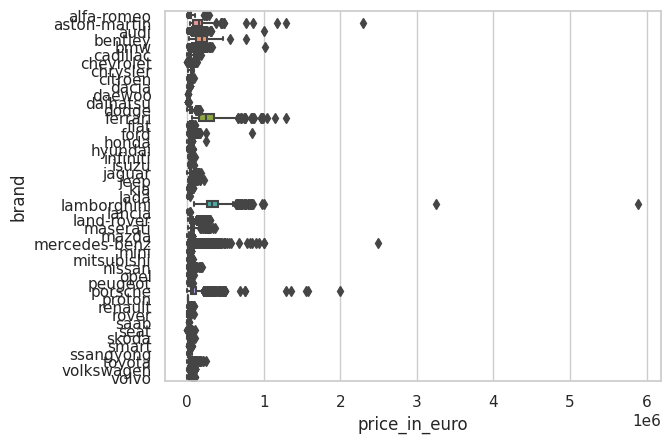

In [ ]:
sns.boxplot(x=data["price_in_euro"],y=data["brand"])


**iam grouping the "brand" and applying for each one the IQR Method of handeling outliers**

In [ ]:
import pandas as pd

# Assuming data is your DataFrame

# Function to remove IQR outliers for a specific brand
def remove_iqr_outliers_by_brand(df):
    # Calculate the first and third quartiles for 'price_in_euro' within each brand group
    Q1 = df['price_in_euro'].quantile(0.25)
    Q3 = df['price_in_euro'].quantile(0.75)

    # Calculate the IQR (Interquartile Range) for 'price_in_euro' within each brand group
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with values beyond the lower and upper bounds
    df_filtered = df[(df['price_in_euro'] >= lower_bound) & (df['price_in_euro'] <= upper_bound)]

    return df_filtered

# Apply the function to remove IQR outliers for each brand
data = data.groupby('brand').apply(remove_iqr_outliers_by_brand)



this is the boxplot after The IQR outlier handleing

<Axes: xlabel='price_in_euro', ylabel='brand'>

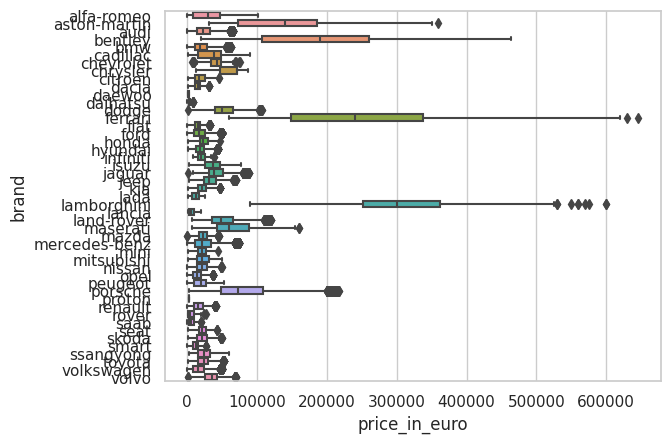

In [ ]:
sns.boxplot(x=data["price_in_euro"],y=data["brand"])


**handling the outliers in power_ps column using transmission_type**

<Axes: xlabel='power_ps', ylabel='transmission_type'>

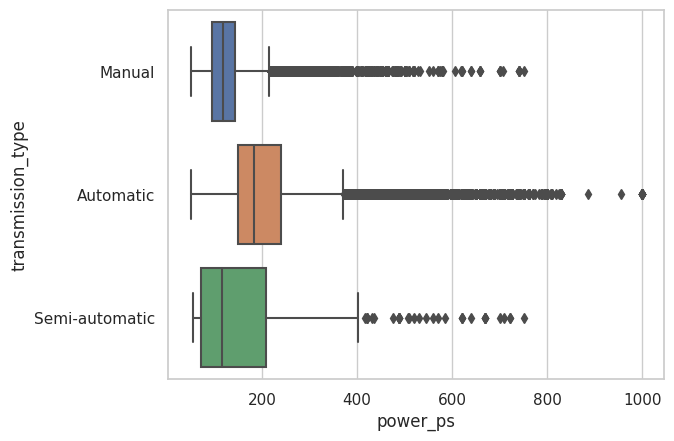

In [ ]:
sns.boxplot(x=data["power_ps"],y=data["transmission_type"])


In [ ]:
# Function to remove IQR outliers for a specific brand
def remove_iqr_outliers_by_brand(df):
    # Calculate the first and third quartiles for 'price_in_euro' within each brand group
    Q1 = df['power_ps'].quantile(0.25)
    Q3 = df['power_ps'].quantile(0.75)

    # Calculate the IQR (Interquartile Range) for 'price_in_euro' within each brand group
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with values beyond the lower and upper bounds
    df_filtered = df[(df['power_ps'] >= lower_bound) & (df['power_ps'] <= upper_bound)]

    return df_filtered

# Apply the function to remove IQR outliers for each brand
data = data.groupby('transmission_type').apply(remove_iqr_outliers_by_brand)



after handling outliers power_ps

<Axes: xlabel='power_ps', ylabel='transmission_type'>

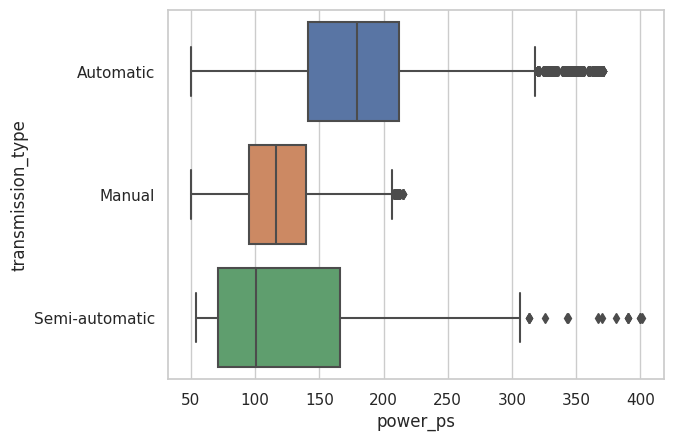

In [ ]:
sns.boxplot(x=data["power_ps"],y=data["transmission_type"])


In [ ]:
data[(data["transmission_type"] =="Manual")&(data["power_ps"]>250)]

,,,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description,model_enc,fuel_type_enc,transmission_type_enc
transmission_type,brand,,,,,,,,,,,,,,,,,


<Axes: xlabel='fuel_consumption_l_100km', ylabel='fuel_type'>

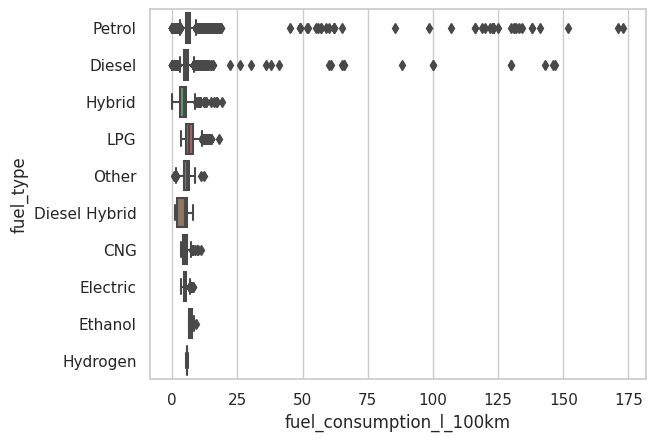

In [ ]:
sns.boxplot(x=data["fuel_consumption_l_100km"],y=data["fuel_type"])


In [ ]:
# Function to remove IQR outliers for a specific brand
def remove_iqr_outliers_by_brand(df):
    # Calculate the first and third quartiles for 'price_in_euro' within each brand group
    Q1 = df['fuel_consumption_l_100km'].quantile(0.25)
    Q3 = df['fuel_consumption_l_100km'].quantile(0.75)

    # Calculate the IQR (Interquartile Range) for 'price_in_euro' within each brand group
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with values beyond the lower and upper bounds
    df_filtered = df[(df['fuel_consumption_l_100km'] >= lower_bound) & (df['fuel_consumption_l_100km'] <= upper_bound)]

    return df_filtered

# Apply the function to remove IQR outliers for each brand
data = data.groupby('fuel_type').apply(remove_iqr_outliers_by_brand)



<Axes: xlabel='fuel_consumption_l_100km', ylabel='fuel_type'>

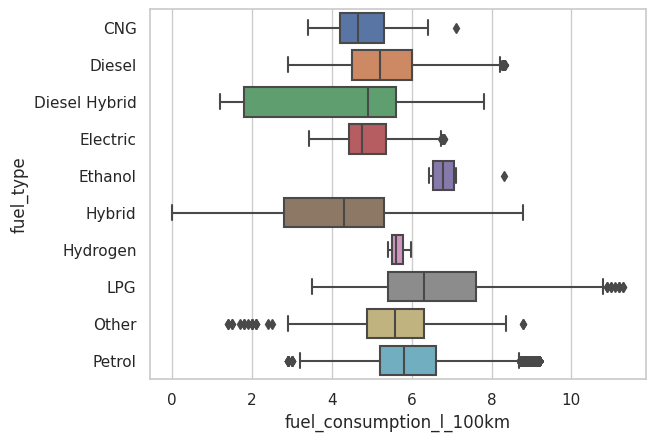

In [ ]:
sns.boxplot(x=data["fuel_consumption_l_100km"],y=data["fuel_type"])


i grouped them in the index by mistake so iam reseting the index

In [ ]:
data = data.reset_index(drop=True)

# Research Question

**"How does the 'Year' of a vehicle influence its 'Price in Euro,' and is this**
**relationship affected by factors such as 'brand'**


<ipython-input-1056-e1d8ff1a0f6a>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='price_in_euro', hue='brand', ci=None, data=data_top_brands)


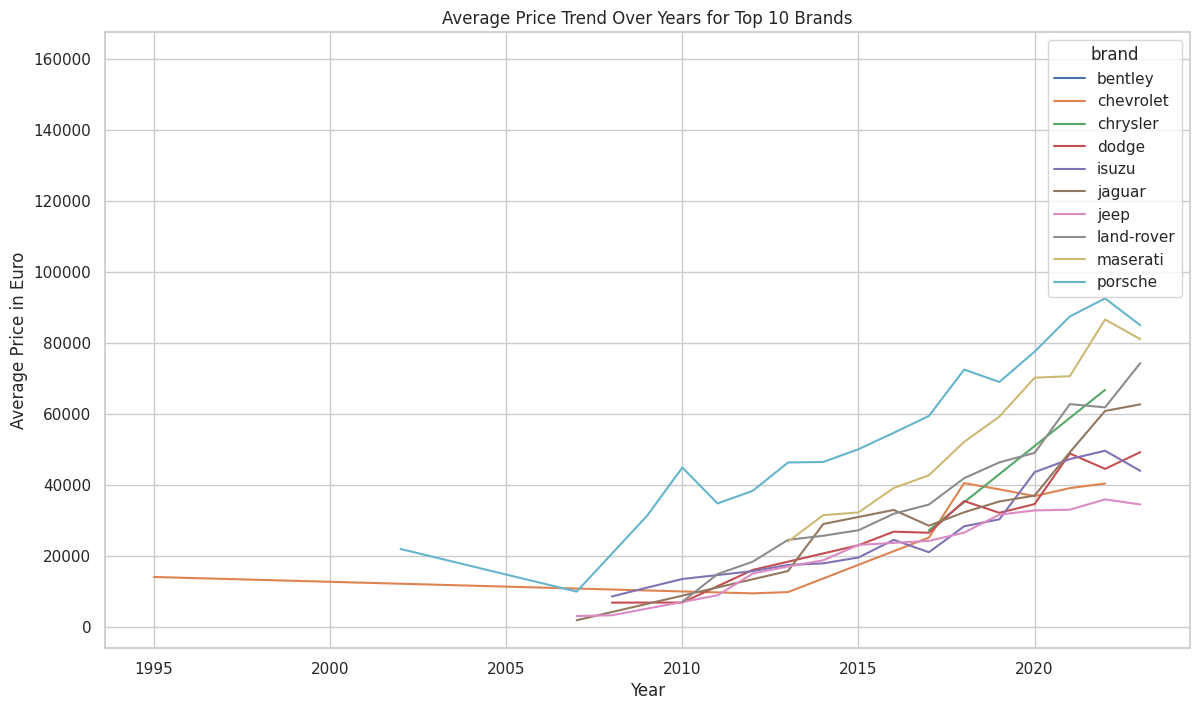

In [ ]:
average_price_by_brand = data.groupby(['brand', 'year'])['price_in_euro'].mean().reset_index()

top_5_brands = average_price_by_brand.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).index

# Filter data for the top 10 brands
data_top_brands = average_price_by_brand[average_price_by_brand['brand'].isin(top_5_brands)]

# Line plot to show the average price trend over the years for each top brand
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='price_in_euro', hue='brand', ci=None, data=data_top_brands)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Price in Euro')
plt.title('Average Price Trend Over Years for Top 10 Brands')

# Display the plot
plt.show()


There is a positive relationship between the 'Year' of a vehicle and its 'Price in Euro.'
As the year of the vehicle increases, the average price tends to increase. This aligns with the expectation that newer vehicles generally command higher prices.

Brand Influence on Price:

The analysis suggests that the 'Brand' of a vehicle influences its price.
Porsche stands out as the brand with the highest average price. This indicates that Porsche vehicles, on average, tend to be priced higher compared to other brands in the dataset.

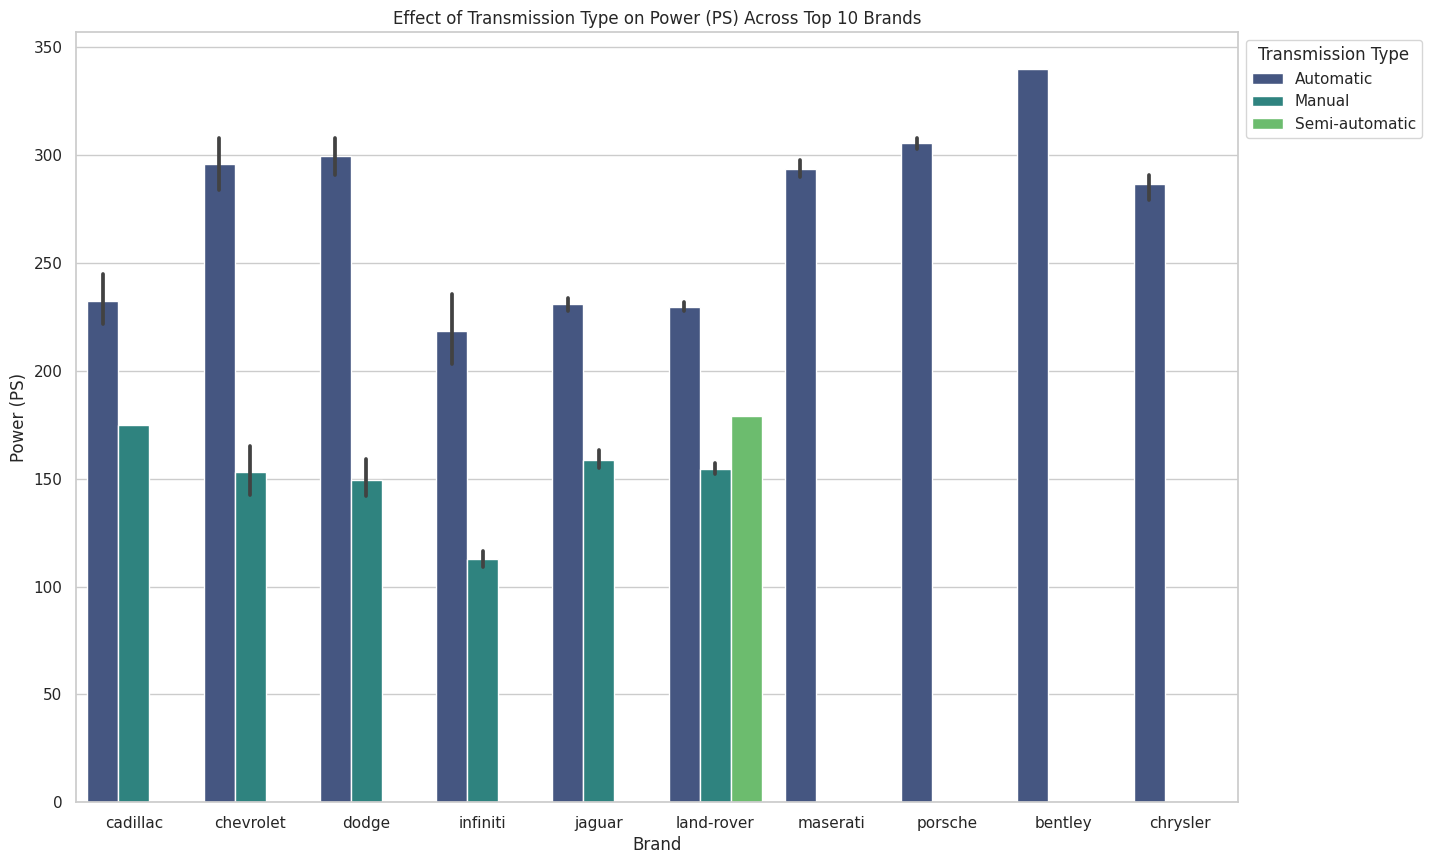

In [ ]:
top_5_brands = data.groupby('brand')['power_ps'].mean().sort_values(ascending=False).head(10).index

# Filter data for the top 10 brands
filtered_data = data[data['brand'].isin(top_5_brands)]

# Plotting
plt.figure(figsize=(15, 10))
barplot = sns.barplot(x=filtered_data['brand'], y=filtered_data['power_ps'], hue=filtered_data['transmission_type'], palette='viridis')

# Add labels and title
plt.title('Effect of Transmission Type on Power (PS) Across Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Power (PS)')
plt.legend(title='Transmission Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


Transmission Type Impact on Power Across Top 10 Car Brands:

Automatic Transmission Dominance: Across the top 10 car brands, the majority of vehicles have automatic transmissions. This suggests a trend where automatic transmissions are more prevalent among these top brands.
Variations in Power Distribution Within Each Brand:

 Bentley stands out as the brand with the highest average power output (in PS) among the top 10 brands. This indicates a performance-oriented approach by Bentley, potentially catering to a market segment that values higher power.

Land Rover is notable for having vehicles with semi-automatic transmissions within the top 10 brands. This might reflect a specific design choice by Land Rover to offer a blend of manual control and automatic convenience in their vehicles.

#**Final Insights**

The analysis indicates a positive correlation between a vehicle's 'Year' and its 'Price in Euro,' suggesting that newer vehicles generally command higher prices.

Brand significantly influences vehicle prices, with Porsche standing out for having the highest average price, indicating a premium positioning compared to other brands in the dataset.

Transmission types vary across the top 10 car brands, with automatic transmissions dominating. Bentley leads in average power output, emphasizing a performance-oriented approach, while Land Rover incorporates semi-automatic transmissions, offering a blend of manual control and automatic convenience in their vehicles. These insights provide valuable market understanding and strategic considerations for both buyers and sellers in the used car market in Germany.